<a href="https://colab.research.google.com/github/mpolancob/AlgorithmsUN2022II/blob/main/Lab2/mpolancob_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 33.9 MB/s 


In [2]:
%reload_ext fortranmagic


/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [3]:
import py_compile

In [4]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [5]:
assert ran_the_first_cell, "Oh noes!"

In [6]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [7]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [8]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [9]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [10]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [11]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [12]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [13]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [14]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [15]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [16]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [17]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [18]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [19]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [20]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [21]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [22]:
%%time

matmul(a, b)

CPU times: user 17 µs, sys: 2 µs, total: 19 µs
Wall time: 21.2 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [23]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [24]:
%%time
matmul(a, b)

IndexError: ignored

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [25]:
def matmul(A, B):
    if len(A[0]) != len(B):
      print("Columns of A different from rows of B")
      return

    
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [26]:
matmul(a,b)

Columns of A different from rows of B


**My own example 5 - Deifining A and B that are compatiible for multiplcation**

In [28]:
A = [[9,8,7],
     [6,5,4],
     [3,2,1],
     [2,3,4]]

B=[[5,6,7,8],
   [9,8,7,6],
   [7,2,6,5]]



**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [29]:
def matmul6(A, B):
    """Multiply matrix A by matrix B."""
    columnsA= len((A[0]))
    rowB= len(B)
    if columnsA != rowB:
      print("Rows of B and columns of A are not equal")
      return None
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [30]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randa = random_matrix(600,100)
randb = random_matrix(100,600)

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [31]:
%%time

import time

media = 0
for i in range(10):
  start_time = time.time()
  randa = random_matrix(600,100)
  randb = random_matrix(100,600)
  matmul6(randa,randb)
  t = time.time() - start_time
  media = media + t

media = media/10
media

CPU times: user 50.7 s, sys: 84 ms, total: 50.8 s
Wall time: 50.9 s


5.094704174995423

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [147]:
import pandas as pd

df = pd.DataFrame()
df['Lenguaje'] = None       
df['Tiempo promedio (s)'] = None
df['Factor de velocidad'] = None


nueva_fila = pd.Series(['Python', media, 0], index=df.columns) # creamos un objeto Seris
df = df.append(nueva_fila, ignore_index=True)

print(df)

  Lenguaje  Tiempo promedio (s) Factor de velocidad
0   Python             0.336705                   0


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [148]:
%%time

import numpy as np

for i in range(10):
  M1 = np.array([randa])
  M2 = np.array([randb])
  print(np.dot(M1, M2))

  media = 0
for i in range(10):
  start_time = time.time()
  np.dot(randa,randb)
  v = time.time() - start_time
  media= media+v

media=media/10

[[[[23.57409005 23.39939027 23.95766168 ... 24.82105635 21.90577075
    22.92254782]]

  [[22.92969622 22.06901477 21.60405403 ... 24.49606231 20.80431255
    23.16205898]]

  [[26.2878199  25.63658322 26.93444666 ... 26.29033232 24.91331531
    25.98811277]]

  ...

  [[23.68061134 23.6449207  23.02329106 ... 23.36029439 22.43045283
    22.38279593]]

  [[25.64701354 26.00645515 24.48857402 ... 26.03919962 23.86304176
    22.82458395]]

  [[25.35537478 25.18214448 25.10396112 ... 26.00258354 25.14517187
    25.20489516]]]]
[[[[23.57409005 23.39939027 23.95766168 ... 24.82105635 21.90577075
    22.92254782]]

  [[22.92969622 22.06901477 21.60405403 ... 24.49606231 20.80431255
    23.16205898]]

  [[26.2878199  25.63658322 26.93444666 ... 26.29033232 24.91331531
    25.98811277]]

  ...

  [[23.68061134 23.6449207  23.02329106 ... 23.36029439 22.43045283
    22.38279593]]

  [[25.64701354 26.00645515 24.48857402 ... 26.03919962 23.86304176
    22.82458395]]

  [[25.35537478 25.18214448 

In [149]:
nueva_fila = pd.Series(['Numpy', media, 0], index=df.columns) # creamos un objeto Seris
df = df.append(nueva_fila, ignore_index=True)

print(df)

  Lenguaje  Tiempo promedio (s) Factor de velocidad
0   Python             0.336705                   0
1    Numpy             0.013052                   0


In [151]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

ValueError: ignored

In [152]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [153]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [154]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [39]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 9.24 ms, sys: 0 ns, total: 9.24 ms
Wall time: 11.2 ms


333328333350000.0

In [40]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 113 µs, sys: 0 ns, total: 113 µs
Wall time: 117 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [41]:
A_1 = [[1, 2],
     [2, 3]]

B_1 = [[1, 2],
     [2, 3]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [160]:
%%fortran
subroutine matmul(A,B,R)
    implicit none
    double precision, intent(in) :: A(2,*)
    double precision, intent(in) :: B(2,*)
    double precision, intent(out) :: R(2,2)
    integer I,J,K,aux
    do I=1,2
      do J=1,2
        R(I,J)=0
        do K=1,2
          R(I,J) = R(I,J) + A(I,K) * B(K,J)
        end do
      end do
    end do
end


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [161]:
matmul (A_1,B_1)

array([[ 5.,  8.],
       [ 8., 13.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [44]:
%%fortran
subroutine matmulti(A,B,N,L,M,R)
    implicit none
    integer, intent(in) :: N,L,M
    double precision, intent(in) :: A(600,*)
    double precision, intent(in) :: B(100,*)
    double precision, intent(out) :: R(N,M)
    integer I,J,K,aux
    do I=1,N
      do J=1,M
        R(I,J)=0
        do K=1,L
          R(I,J) = R(I,J) + A(I,K) * B(K,J)
        end do
      end do
    end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [45]:
A1 = np.array(random_matrix(600,100))
A2 = np.array(random_matrix(100,600))

N=len(A1)
L=len(A1[0])
M=len(A2[0])

matmulti(A1,A2,N,L,M)

array([[24.50713462, 24.65017706, 26.62701106, ..., 22.70618041,
        23.44388004, 23.52303605],
       [25.31236672, 23.8719492 , 25.39005898, ..., 22.29040319,
        24.33747656, 25.59784252],
       [23.54550173, 22.85522152, 24.58241956, ..., 22.19273912,
        23.20892502, 23.46759233],
       ...,
       [23.93773447, 22.7916864 , 25.95441681, ..., 22.39713402,
        23.9821615 , 24.81460687],
       [26.01104835, 22.03350912, 24.844071  , ..., 21.11275973,
        22.93258994, 25.90728191],
       [25.94266546, 24.54733379, 26.91914894, ..., 22.56274854,
        24.07016014, 25.29956848]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [46]:
%%time
for i in range(0,10):
  matmulti(A1,A2,N,L,M)

CPU times: user 258 ms, sys: 1.99 ms, total: 260 ms
Wall time: 263 ms


In [47]:
for i in range(10):
  start_time = time.time()
  matmulti(A1,A2,N,L,M)
  v = time.time() - start_time
  media = media + v

media = media/10

In [48]:
nueva_fila = pd.Series(['Fortran magic', media, 0], index=df.columns) # creamos un objeto Seris
df = df.append(nueva_fila, ignore_index=True)

print(df)

        Language  Average secs Speed factor
0         Python      5.094704            0
1          Numpy      0.013927            0
2  Fortran magic      0.027460            0


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [49]:
%%fortran


subroutine matmul22(A,B,N,L,M,R)
  implicit none
  integer,intent(in) :: N,L,M
  double precision, intent(in) :: A(600,*)
  double precision, intent(in) :: B(100,*)
  double precision, intent(out) :: R(N,M)
  integer I,X,J,K,aux
  do X=0, 10
    do I=1,N
      do J=1,M
        R(I,J)=0
        do K=1,L
          R(I,J) = R(I,J) + A(I,K)*B(K,J)

        end do
      end do
    end do
  end do
end

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [50]:
A1 = np.array(random_matrix(600,100))
A2 = np.array(random_matrix(100,600))

N=len(A1)
L=len(A1[0])
M=len(A2[0])

matmul22(A1,A2,N,L,M)

for i in range(10):
  start_time = time.time()
  matmul22(A1,A2,N,L,M)
  v = time.time() - start_time
  media = media+v

media=media/10

**My own example 18 - Adding Fortran average execution time to the data frame**

In [51]:
nueva_fila = pd.Series(['Fortran', media, 0], index=df.columns) # creamos un objeto Seris
df = df.append(nueva_fila, ignore_index=True)

print(df)


        Language  Average secs Speed factor
0         Python      5.094704            0
1          Numpy      0.013927            0
2  Fortran magic      0.027460            0
3        Fortran      0.336705            0


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [52]:
%%writefile PRUEBA.c
#include <stdio.h>        
#include <stdlib.h>
#include <stdio.h>
#include <time.h> 
#define n 600
#define m 100
void multiplicar(int a[n][m],int b[m][n]){
    float suma;
    float c[n][n];
    for (int x = 0; x < n; x++) {
        // Dentro recorremos las filas de la primera (A)
        for (int i = 0; i < n; i++){ 
            suma =0;
            // Y cada columna de la primera (A)
            for (int j = 0; j < m; j++) {
                // Multiplicamos y sumamos resultado
                suma += a[i][j] * b[j][x];
            }
            // Lo acomodamos dentro del producto
            c[i][x] = suma;     
        }
    }

}
int main(void) {
    //matriz a
    double time_spent = 0.0;
    int matrizA[600][100];
    for(int x=0;x<600;x++){
        for(int y=0;y<100;y++){
            matrizA[x][y]=rand()%100;
        }   
    }

    int matrizB[100][600];
    for(int x=0;x<100;x++){
        for(int y=0;y<600;y++){
            matrizB[x][y]=rand()%100;
        }   
    }
    clock_t begin = clock();
    for(int x=0;x<10;x++){
        multiplicar(matrizA,matrizB);    
    }
    
    clock_t end = clock();
    time_spent += (double)((end - begin)/10) / CLOCKS_PER_SEC;
    printf("average execution time is %f seconds", time_spent);
  
    return 0;
}




Writing PRUEBA.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [53]:

%%shell
gcc PRUEBA.c -o output
./output

average execution time is 0.136597 seconds

**My own example 21 - Adding c average execution time to the data frame**

In [54]:
nueva_fila = pd.Series(['C', 0.138, 0], index=df.columns) # creamos un objeto Seris
df = df.append(nueva_fila, ignore_index=True)

print(df)

        Language  Average secs Speed factor
0         Python      5.094704            0
1          Numpy      0.013927            0
2  Fortran magic      0.027460            0
3        Fortran      0.336705            0
4              C      0.138000            0


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [55]:
%%writefile matrixmul.cpp
#include<iostream>
#include<stdlib.h>
#include<time.h>
#include <chrono>
#include <ctime>    

using namespace std;
int main()
{

 srand(time(0)); //creacion matriz 1
 int matrix1[600][100], i ,j, matrix2[100][600], k ,l, result [600][600], p;
 
 for( i = 0; i < 600; ++i)
  {for( j = 0;  j < 100; ++j)
     {matrix1[i][j] = rand()%100;}
  }
 

//creacion matriz
 for( k = 0; k < 100; ++k)
  {
      for( l = 0;  l < 600; ++l)
     {matrix1[k][l] = rand()%100;}
  }

float mean;
for (p = 0; p<10; p++){
 auto start = std::chrono::system_clock::now();

 for (int m = 0; m <600 ; m++)//multiplicacion matrices
 {
   for (int n = 0; n < 600; n++){
       
     for (int o = 0; o < 100; o++){
         
      result[m][n] +=  matrix1[m][o] * matrix2[o][n];
      
     }
       
   }

 }
    auto end = std::chrono::system_clock::now(); 
    std::chrono::duration<double> elapsed_seconds = end-start;
    mean = mean + elapsed_seconds.count();
}
cout<<mean/10;



   return 0; 
  }

Writing matrixmul.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [56]:

!g++ matrixmul.cpp -o matrixmul
!./matrixmul


0.105342

**My own example 24 - Adding C++ average execution time to the data frame**

In [57]:
nueva_fila = pd.Series(['C++', 0.108, 0], index=df.columns) # creamos un objeto Seris
df = df.append(nueva_fila, ignore_index=True)

print(df)


        Language  Average secs Speed factor
0         Python      5.094704            0
1          Numpy      0.013927            0
2  Fortran magic      0.027460            0
3        Fortran      0.336705            0
4              C      0.138000            0
5            C++      0.108000            0


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [58]:
%%writefile Hola.java
public class Main {
    
        public static int[][] multiplicacionMatrices ( int[][] a, int[][] b) {
          
      int[][] c = new int[a.length][b[0].length];
      
      for (int i= 0; i<c.length; i++)
          for (int j=0; j<c[0].length; j++)
              for (int k=0; k<b.length; k++)
                  c[i][j] = c[i][j] + a[i][k] * b[k][j];
                  
      return c;
      
   }


   public static void main(String[] argumentos) {

        int[][] matrizA = new int[600][100];
        for (int x=0; x < matrizA.length; x++) {
          for (int y=0; y < matrizA[x].length; y++) {
             matrizA[x][y] = (int) (Math.random()*9+1);
         }
}
        int[][] matrizB = new int[100][600];
          for (int x=0; x < matrizB.length; x++) {
            for (int y=0; y < matrizB[x].length; y++) {
              matrizB[x][y] = (int) (Math.random()*9+1);
         }
}
          double a= 0.0;
          long mean=0;
        for(int i=0; i<10;i++){
          long inicio = System.currentTimeMillis();
          multiplicacionMatrices(matrizA,matrizB);   
          long fin = System.currentTimeMillis();
          long tiempo = (long) ((fin - inicio)); 
          mean = mean + tiempo;
        }
        a=mean/10;
        a= a*0.001;
        System.out.println(a);
       
        

}
        
        }

Writing Hola.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [59]:
!java Hola.java

0.059000000000000004


**My own example 27 - Adding Java average execution time to the data frame**

In [60]:
nueva_fila = pd.Series(['Java', 0.059, 0], index=df.columns) # creamos un objeto Seris
df = df.append(nueva_fila, ignore_index=True)

print(df)

        Language  Average secs Speed factor
0         Python      5.094704            0
1          Numpy      0.013927            0
2  Fortran magic      0.027460            0
3        Fortran      0.336705            0
4              C      0.138000            0
5            C++      0.108000            0
6           Java      0.059000            0


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [61]:
%%writefile tmp.js

var myArray = []

for (var i = 0; i < 600; i++) {
  a=Array.from({length: 100}, () => Math.floor(Math.random() * 40));
  myArray.push(a)
}

var myArray_2 = []

for (var i = 0; i < 100; i++) {
  a=Array.from({length: 600
  }, () => Math.floor(Math.random() * 40));
  myArray_2.push(a)
}

sum=0
for(i=0; i<10;i++){
    var start = Date.now();
    mult(myArray,myArray_2)
    var end = Date.now();
    sum +=(end-start)
}

console.log(`Average time: ${sum/10} ms`)

function mult(a,b){
 fil_m1 = a.length;
    col_m1 = a[0].length;
    fil_m2 = b.length;
    col_m2 = b[0].length;
    let multiplicacion = new Array(fil_m1);
    for (x=0; x<multiplicacion.length;x++){
        multiplicacion[x] = new Array(col_m2).fill(0);
        
    }
    for (x=0; x < multiplicacion.length; x++) {
        for (y=0; y < multiplicacion[x].length; y++) {                                
            for (z=0; z<col_m1; z++) {
                multiplicacion [x][y] += + a[x][z]*b[z][y]; 
            }
        }
    }
}

Writing tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [62]:
!node tmp.js

Average time: 198.2 ms


**My own example 30 - Adding Javascript average execution time to the data frame**

In [63]:
nueva_fila = pd.Series(['JavaSript', 0.199, 0], index=df.columns) # creamos un objeto Seris
df = df.append(nueva_fila, ignore_index=True)

print(df)

        Language  Average secs Speed factor
0         Python      5.094704            0
1          Numpy      0.013927            0
2  Fortran magic      0.027460            0
3        Fortran      0.336705            0
4              C      0.138000            0
5            C++      0.108000            0
6           Java      0.059000            0
7      JavaSript      0.199000            0


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [64]:
min = df.loc[:,'Average secs'] == df['Average secs'].min()
print(df.loc[min])


  Language  Average secs Speed factor
1    Numpy      0.013927            0


**My own example 32 - Adding the Speed factor columne to the data frame**

In [65]:
b=df['Average secs'].min()
lista =[]
for i in range(df.shape[0]):
  lista.append( (df.loc[i,'Average secs']) /b)

df['Speed factor']=lista

df.head()

,Language,Average secs,Speed factor
0,Python,5.094704,365.825374
1,Numpy,0.013927,1.000000
2,Fortran magic,0.027460,1.971784
3,Fortran,0.336705,24.177077
4,C,0.138000,9.909094


**My own example 33 - Sorting the the data frame by average execution time**

In [66]:
ordered = df.sort_values('Average secs')
print(ordered)

        Language  Average secs  Speed factor
1          Numpy      0.013927      1.000000
2  Fortran magic      0.027460      1.971784
6           Java      0.059000      4.236497
5            C++      0.108000      7.754943
4              C      0.138000      9.909094
7      JavaSript      0.199000     14.289201
3        Fortran      0.336705     24.177077
0         Python      5.094704    365.825374


## Why is the Python Version so Much Slower?

In [67]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [68]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [69]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [70]:
data + data

array([2, 4, 6, 8])

In [71]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 845 µs, sys: 0 ns, total: 845 µs
Wall time: 632 µs


333328333350000.0

In [72]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.19 ms, sys: 5.02 ms, total: 6.21 ms
Wall time: 5.31 ms


333328333350000.0

In [73]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 129 µs, sys: 3 µs, total: 132 µs
Wall time: 136 µs


333328333350000.0

In [74]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [75]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [76]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [77]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [78]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [79]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [80]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [81]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [82]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [83]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [84]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [85]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [86]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [87]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [88]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [89]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [90]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [91]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [92]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [93]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [94]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [95]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [96]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [97]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [98]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [99]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [100]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [101]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [102]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [103]:
variance(np.random.standard_normal(1000))

1.0173045333038564

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [104]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [105]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [106]:
data.mean()

14.5

In [107]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [108]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [109]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [110]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [111]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [112]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [113]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [114]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [115]:
# ... or by label.
s.loc['a']

1

In [116]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [117]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [118]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [119]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [120]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [121]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [122]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [128]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [129]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [130]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

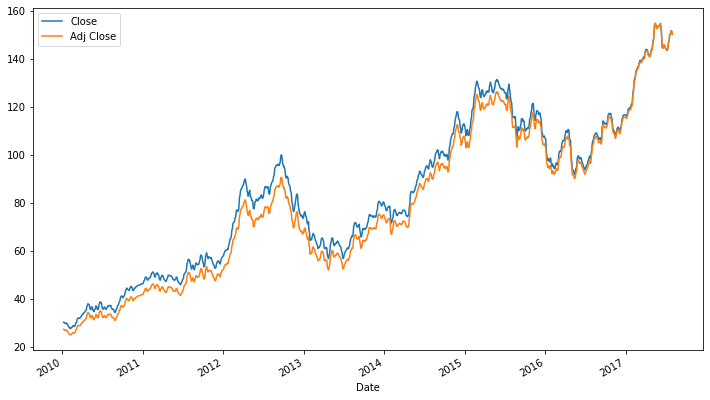

In [131]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

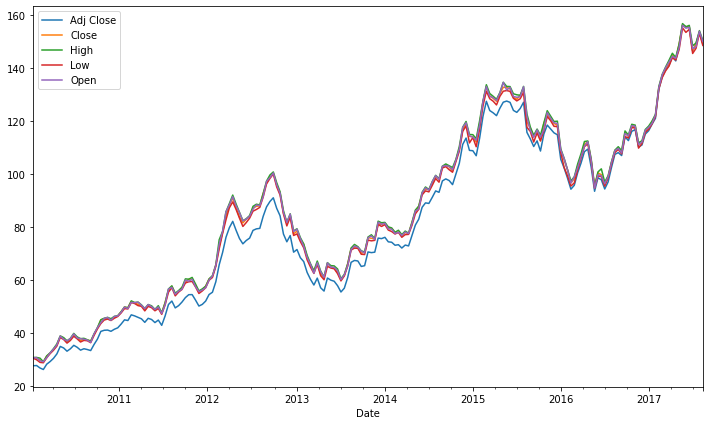

In [132]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

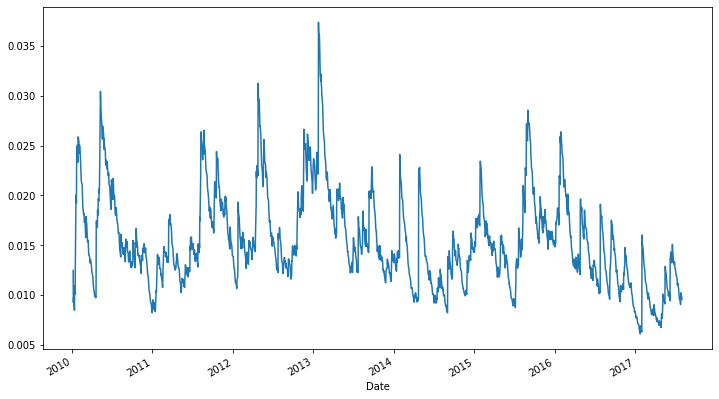

In [133]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [134]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [135]:
## Needed Libraries.
from urllib.parse import urlencode 
import pandas as pd

import requests

## In this case, we will obtain TOMATOES data.
base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
query_params = {
  'class': ['VEGETABLES'], ## Change Fruit with Vegetables
  'commodity': ['TOMATOES'], ## Change Avocados with Tomatoes
  'compareLy': ['No'],
  'endDate': ['01/01/2021'], ## Hardcoding end Date
  'repDate': ['01/01/2020'], ## Hardcoding rep Date
  'format': ['excel'],
  'organic': ['ALL'],
  'portal': ['fv'],
  'region': ['ALL'],
  'type': ['retail'],
}

## Build URL to send request.
url = base_url + '?' + urlencode(query_params, doseq=1)

## Request data from url
resp = requests.get(url, stream=True)

## Create File with data.
with open('data.html', 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
            f.close()

## Read data from file.
tomatoes_data = pd.read_html('data.html', header=0)[0] 
## Be careful, this data is uncleaned, If you want to use it correctly, you will first have to clean it


## You now have data of tomatoes in the United States! Hurra!

In [136]:

avocados = read_avocadata('2014', '2016')
avocados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: FutureWarning: The default value of regex will change from True to False in a future version.


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [137]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

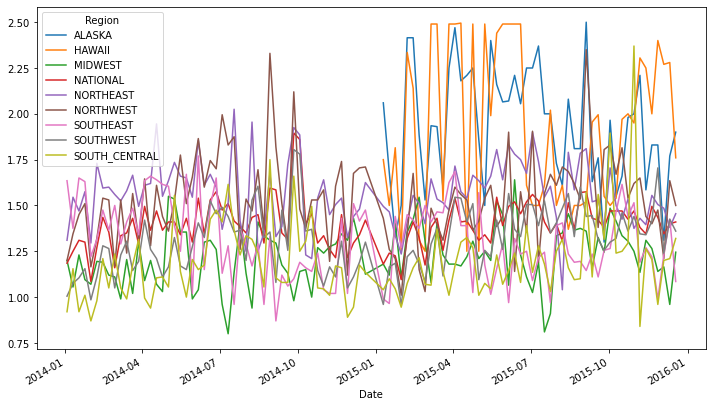

In [138]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [139]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

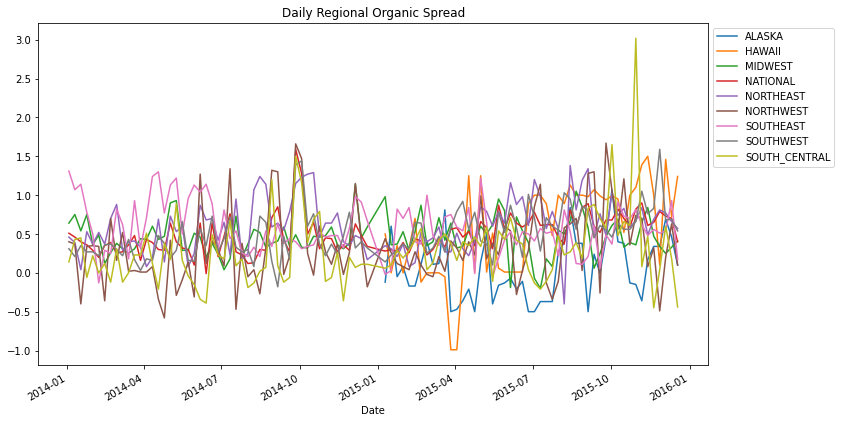

In [140]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [141]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


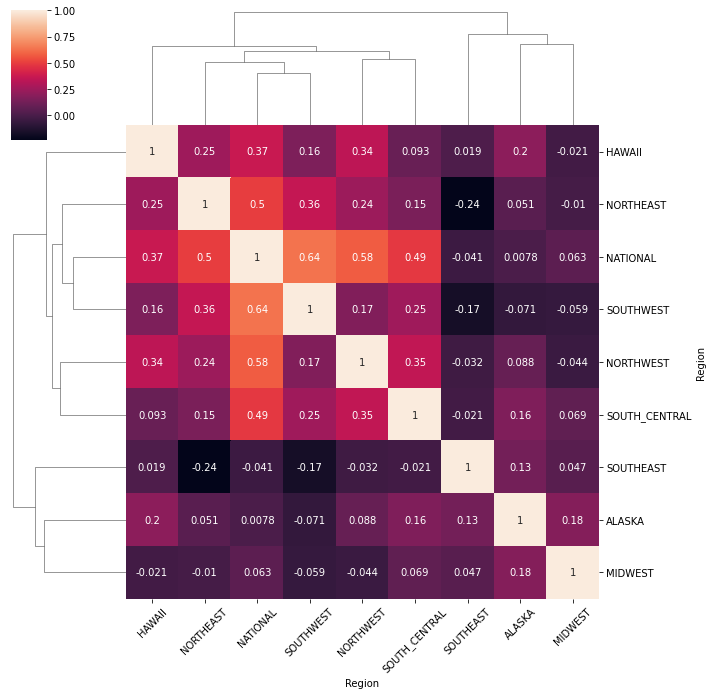

In [142]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**My own example 34 importing and analizing data fromdatos.gov.co**

**Programa Nacional Integral de Sustitucion de Cultivos Ilicitos**

https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Avance_Atencion_PNIS/v4pt-rnn9/data

In [162]:
import pandas as pd
info = pd.read_csv("v4pt-rnn9.csv",decimal=',')
info

,divipola_municipal,departamento,municipio,pagos_asistencia_alimentaria,asistencia_t_cnica_integral,autosostenimiento_y_seguridad,proyectos_productivos_pp,recolectores,corte
0,5040,ANTIOQUIA,ANORÍ,1,1,1,0.99,0.87,2022-07-31T00:00:00.000
1,5107,ANTIOQUIA,BRICEÑO,1,1,1,1,0.99,2022-07-31T00:00:00.000
2,5120,ANTIOQUIA,CÁCERES,1,1,1,1,0.96,2022-07-31T00:00:00.000
3,5361,ANTIOQUIA,ITUANGO,0.95,0.93,0.93,0.93,0.64,2022-07-31T00:00:00.000
4,5790,ANTIOQUIA,TARAZÁ,1,1,0.98,0.98,0.75,2022-07-31T00:00:00.000
5,81065,ARAUCA,ARAUQUITA,1,1,1,0.99,0.96,2022-07-31T00:00:00.000
6,13160,BOLÍVAR,CANTAGALLO,1,1,0.98,0.67,0,2022-07-31T00:00:00.000
7,13670,BOLÍVAR,SAN PABLO,1,0.99,0.99,0.99,0,2022-07-31T00:00:00.000
8,13688,BOLÍVAR,SANTA ROSA DEL SUR,1,1,0.99,0.93,0,2022-07-31T00:00:00.000
9,18094,CAQUETÁ,BELÉN DE LOS ANDAQUÍES,1,1,0.98,0.99,0,2022-07-31T00:00:00.000


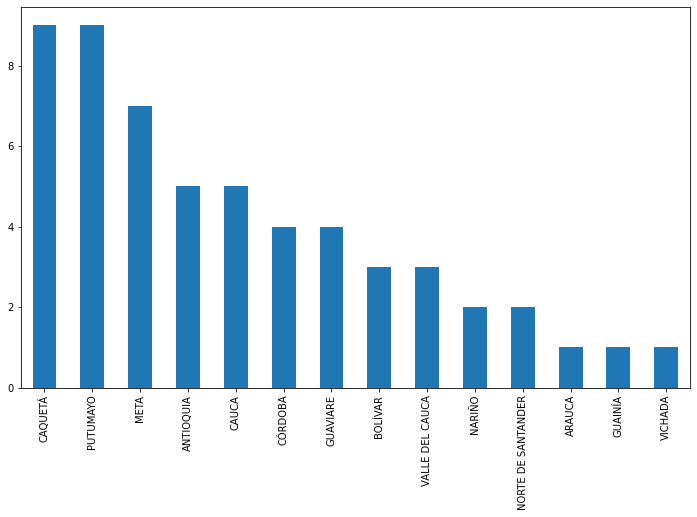

In [163]:
info["departamento"].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


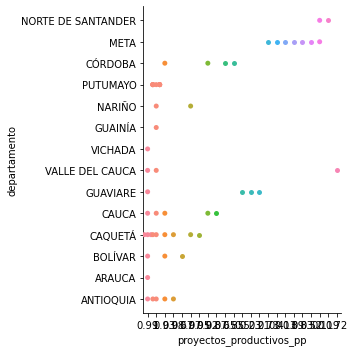

In [167]:
sns.catplot(x='proyectos_productivos_pp', y='departamento', kind='swarm', data= info)

In [168]:
pclass_column = info['pagos_asistencia_alimentaria']
pclass_column.describe()

count     56
unique     4
top        1
freq      51
Name: pagos_asistencia_alimentaria, dtype: object

In [169]:
info.sort_values(by='pagos_asistencia_alimentaria', ascending=False)

,divipola_municipal,departamento,municipio,pagos_asistencia_alimentaria,asistencia_t_cnica_integral,autosostenimiento_y_seguridad,proyectos_productivos_pp,recolectores,corte
0,5040,ANTIOQUIA,ANORÍ,1,1,1,0.99,0.87,2022-07-31T00:00:00.000
42,54810,NORTE DE SANTANDER,TIBÚ,1,0.8,0.8,0.19,0.19,2022-07-31T00:00:00.000
31,95001,GUAVIARE,SAN JOSÉ DEL GUAVIARE,1,1,1,0.99,0.68,2022-07-31T00:00:00.000
32,50350,META,LA MACARENA,1,1,0.95,0.73,0,2022-07-31T00:00:00.000
33,50325,META,MAPIRIPÁN,1,1,0.99,0.4,0.95,2022-07-31T00:00:00.000
34,50330,META,MESETAS,1,1,0.87,0.13,0,2022-07-31T00:00:00.000
35,50450,META,PUERTO CONCORDIA,1,0.92,0.9,0.89,0.99,2022-07-31T00:00:00.000
36,50590,META,PUERTO RICO,1,1,0.96,0.83,0.14,2022-07-31T00:00:00.000
37,50370,META,URIBE,1,1,0.95,0.52,0.92,2022-07-31T00:00:00.000
38,50711,META,VISTAHERMOSA,1,1,0.86,0.1,0.22,2022-07-31T00:00:00.000


# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!